# Part 7: Advanced topics on gradient descent

In [18]:
import importlib


import numpy as np # linear algebra
import pandas as pd #dataframe library
import sklearn # machine learning library
assert sklearn.__version__ >= '0.2'
from sklearn import datasets
import random
np.random.seed(seed=42) # to have same results each time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import useful_functions
importlib.reload(useful_functions)
from useful_functions import generate_dataset, unison_shuffled_copies, get_train_test_datasets, gradient_descent, gradient_descent_with_momentum, plot_convergence_rate,plot_convergence_rate_with_momentum, plot_evolution_on_test_error, plot_evolution_on_test_error_with_bias


### Question 1: For the objective of Question 2, Part 1, implement Heavy Ball. Try several momentum parameters and stepsizes, and find the best ones.

In [19]:
#% of rows to include in training dataset
TRAINING_RATIO = 0.75

In [20]:
dataset = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
A = dataset['data']
Y = dataset['target']
A_shuffled, Y_shuffled = unison_shuffled_copies(A, Y)
A_train, Y_train, A_test, Y_test = get_train_test_datasets(A_shuffled, Y_shuffled,TRAINING_RATIO)

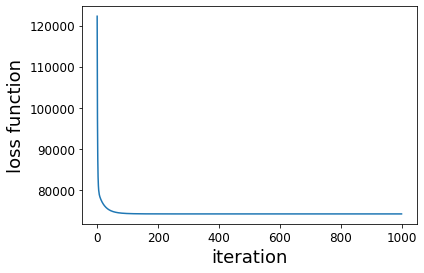

In [21]:
nb_of_iterations = 1000
step_size = 1e-5
gamma = 0.2

iteration, loss_function_array = gradient_descent_with_momentum(A_train, Y_train, nb_of_iterations, step_size, gamma)
plt.plot(iteration, loss_function_array)   
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()

We already know optumal step size we just optimize on gamma.

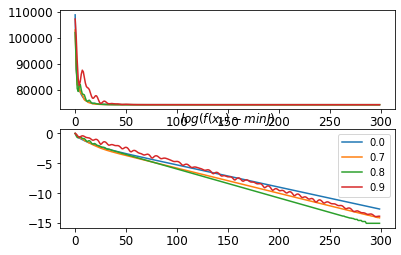

In [25]:
niter = 300
step_size = 3e-5
plot_convergence_rate_with_momentum(A_train,Y_train, niter, step_size)

### Question 2: With these parameters, how does Heavy Ball compare with gradient descent?


Both converge to same value, but not same speed.

### Question 3: Propose a non-convex loss function for your regression or classification problem (for instance, you can add a non-convex penalty to your convex objective, like the p-norm for 0<p<1, or you can try prediction with a multilayer perceptron, as here). Try minimizing the loss with gradient descent, and check that you reach at least an approximate first-order approximate critical point. Do you get good prediction results?

In [29]:
def grad_non_convex_term(x,p):
    '''
    Calculate the gradient for Lp norm with x convex 
    '''
    dim = len(x)
    value = np.linalg.norm(x, ord=p)
    grad = np.zeros(dim)
    for d in range(dim):
        grad[d] =  np.sign(x[d])*(np.abs(x[d])/value)**(p-1)
    return grad 

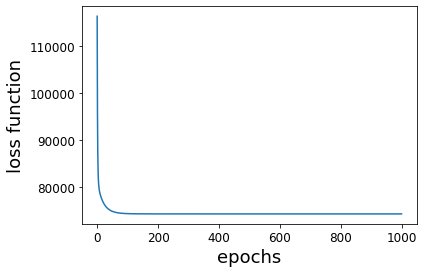

Optimal parameter is:
[ 0.84247891  0.11843842 -0.27779092  0.2974131  -0.00659857 -0.04489948
 -0.88613321 -0.85998208]


In [49]:
#GD implementation non convex loss
n_epochs = 1000
step_size = 1e-5
lbda = 1
p = 0.5 #0<p<1 for non convex term
D = A_train.shape[1] # dimension of pbm 
x = np.random.rand(D) # random initialization

loss_function_array = []
epochs = []

for epoch in range(n_epochs):
    #here only one iteration per epoch
    epochs.append(epoch)
    
    loss_function_train = np.linalg.norm(np.dot(A_train,x)-Y_train)**2 + lbda*np.linalg.norm(x, ord=p) # add non convex reg
    loss_function_array.append(loss_function_train)
    
    gradients = 2*A_train.T.dot(np.dot(A_train,x)-Y_train) + lbda*grad_non_convex_term(x,p)
    x = x-step_size*gradients

plt.plot(epochs, loss_function_array)   
plt.xlabel("epochs", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.show()
print("Optimal parameter is:")
print(x)

In [51]:
#gradient converges towars 0
gradients

array([ 2.74848287e-04,  5.14528318e-05, -4.74977393e-04,  3.77810499e-04,
        1.66994529e-05, -1.60123530e-05,  6.60844273e-04,  6.28983179e-04])